Decision Tree Classifier Building in Scikit-learn using Pima Indian Diabetes dataset

In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
# Loading data
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

pima = pd.read_csv("diabetes.csv", header=None, names=col_names)


In [8]:
pima.drop(pima.index[0], inplace=True)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Split data into training and testing sets
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']

X = pima[feature_cols]

y = pima.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [10]:
# Building Decision Tree classifier
clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [11]:
# Evaluating the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6753246753246753


In [12]:
# export_graphviz function converts decision tree classifier into dot file 
# pydotplus convert this dot file to png or displayable form on Jupyter.
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

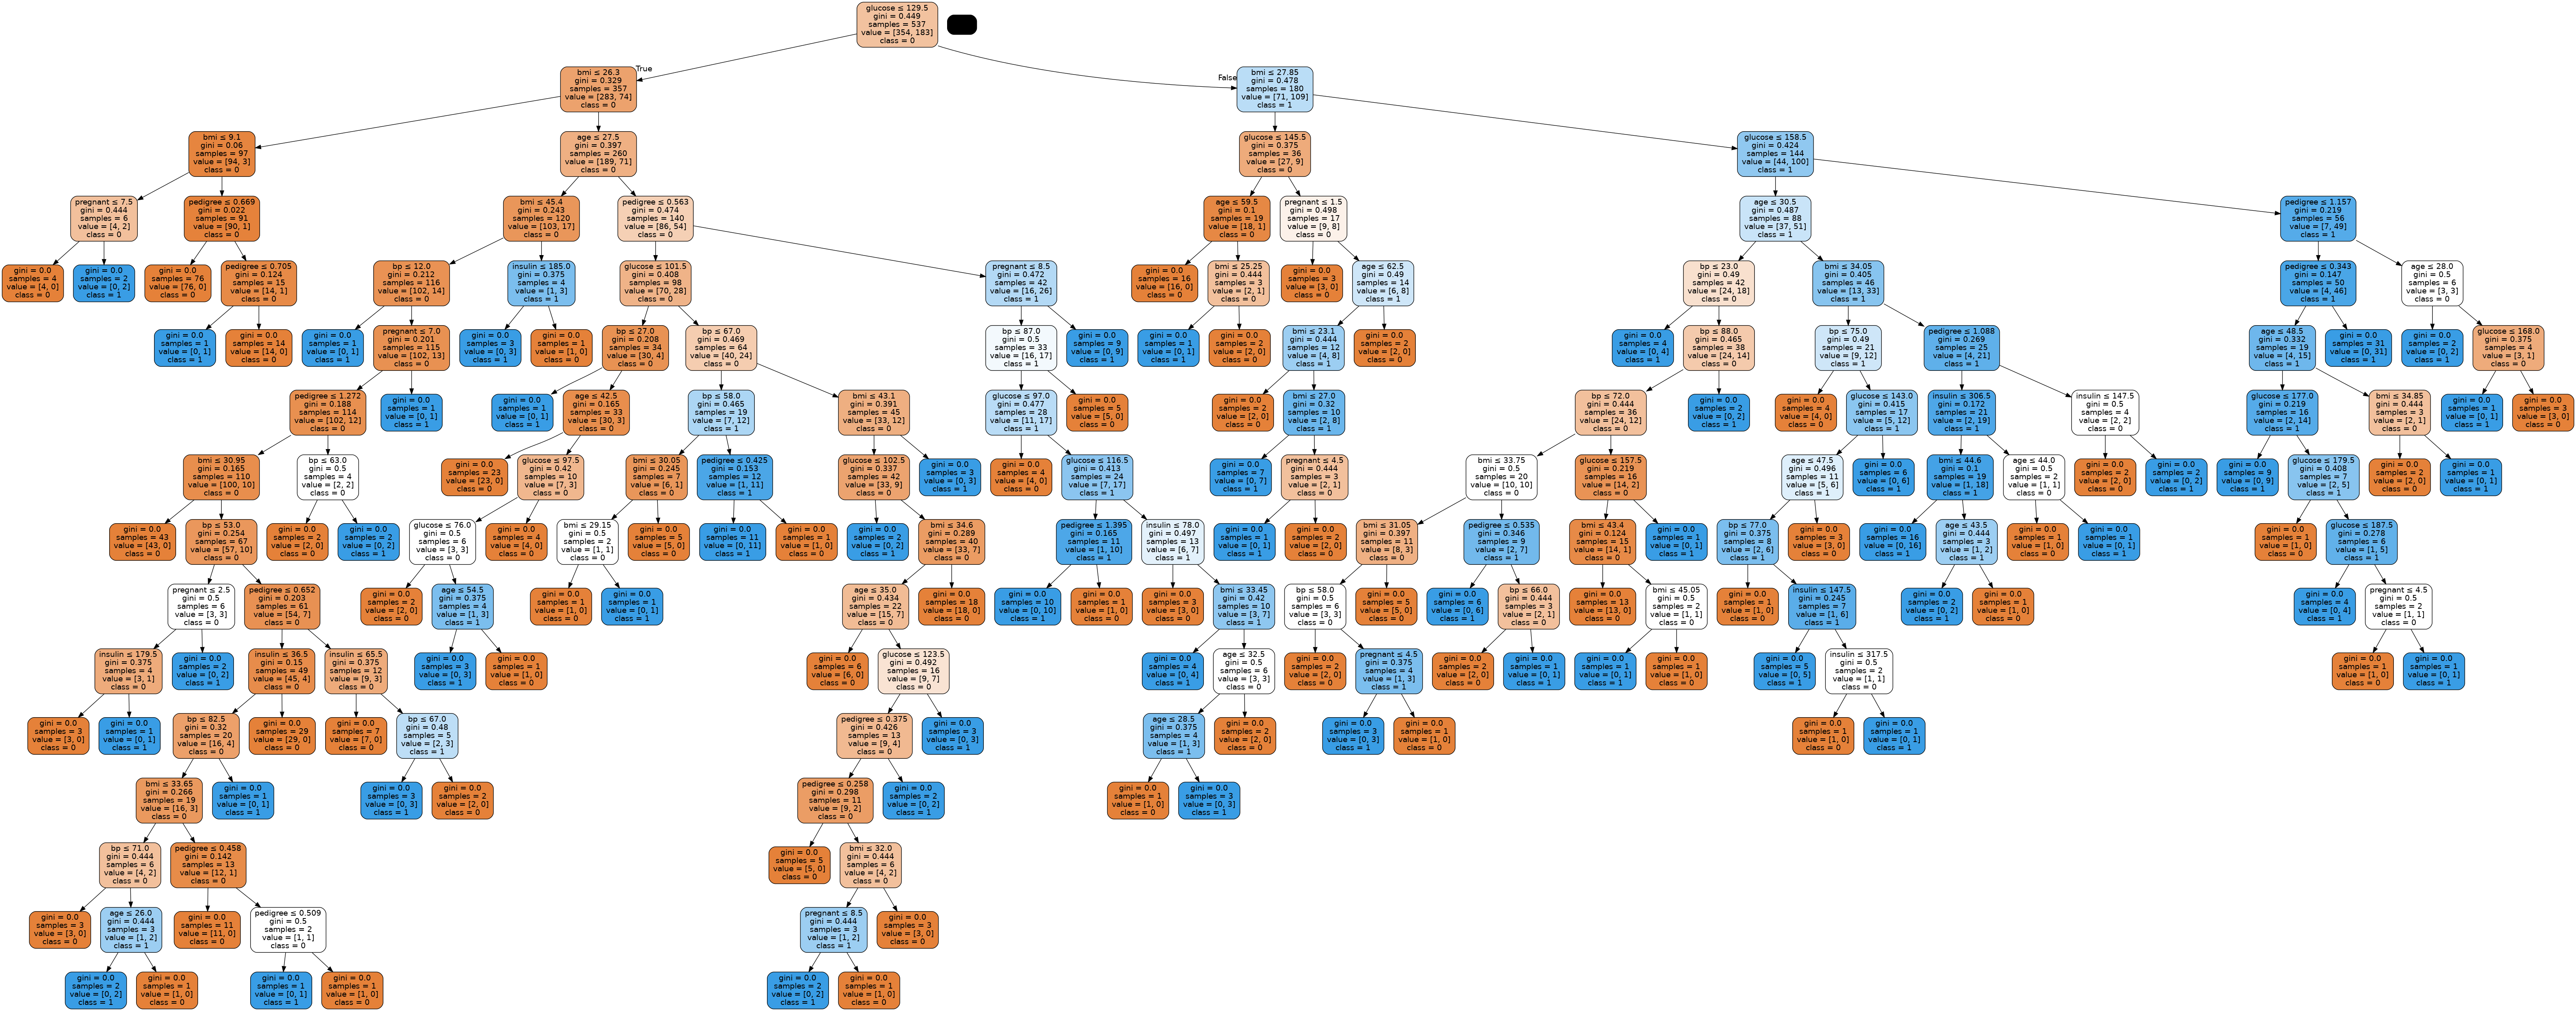

In [15]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=feature_cols, class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [16]:
# Optimising decision tree performance
clf = DecisionTreeClassifier(max_depth=3, criterion='entropy')

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706
